# Figure 3-4: Experiment 1, Neuroimaging Spatial Phase ($\mu_{||\phi||}$ and $\sigma_{||\phi||}$),
This notebook is used to recreate Figure 3-4, showing the spatial phase mean [$\mu_{||\phi||}$] and variation [$\sigma_{||\phi||}$] results for the neuroimaging data in Experiment 1. The data acquired has the following dimensions:
 1. X = 128
 2. Y = 100
 3. Slices = 6
 4. Diffusion directions [b=0 + $G_x$, $G_y$, $G_z$] = 4
 5. Repetitions = 5
 6. Trigger Delays = 8

A user can selcet the volunteer, slice, and diffusion direction, and trigger-delay to then compute the mean and standard deviation of the spatial phase for a given grouping of images (Fig. 3). For the paper, 2 different timepoints were shown. The user can also select the slice and diffusion direction to plot the mean spatial phase variation and standard deviation of the spatial phase variation across the 8 different trigger delay times (Fig. 4).  

The last portion of the code shows heatmaps so a user can test signifiance between different different motion compensation levels for different trigger-delay times, diffusion directions, and slice positioning. The other two heatmaps test signifiance for a given level of motion compsnation, to observe whether there were significant differences between the slices or timepoints. These statistical test heatmaps were used for testing whether there were signifiant differences between motion compensation levels as well as changes in the trigger -delay time and slice positioning for a given motion compensation level. 

Contact for questions:\
Ariel Hannum\
ahannum@stanford.edu\
Stanford University


# Figure 3: Spatial Phase maps ($\mu_{||\phi||}$ and $\sigma_{||\phi||}$)

In [1]:
# Import utilities
from cmcrameri import cm
from helper_phase_utils import *
from matplotlib import pyplot as plt
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.widgets import Slider,RadioButtons,CheckButtons
import numpy as np
import pandas as pd
import tkinter as tk
import seaborn as sns


/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
# Load data
directory = '/Users/arielhannum/Documents/Stanford/CMR-Setsompop/Projects/Phase/Data/Brain' #'/Volumes/T7/phase_data/Brain'

colorA = sns.color_palette("mako",as_cmap = True)
colorB = cm.lajolla_r


/Users/arielhannum/Documents/GitHub/dwi_phase/Interactive_Figs/helper_phase_utils.py:343: RuntimeWarning: Mean of empty slice
  mean_map = np.nanmean(spatial_map*mask[:,:,np.newaxis],axis = -1)
/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


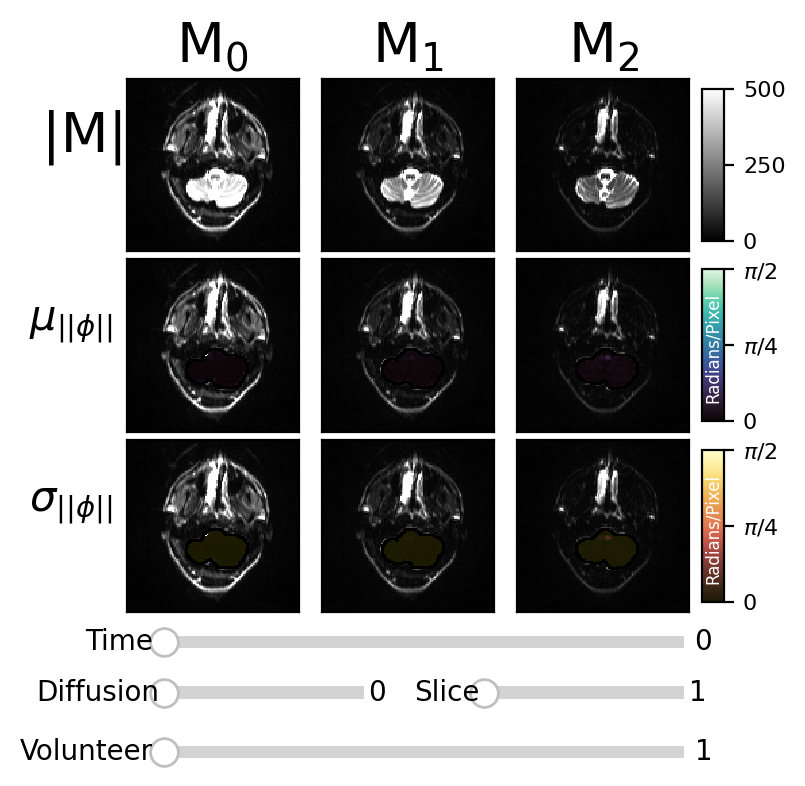

In [3]:
# Function to update the heatmap based on the slider value
def update_heatmap():
    for ii in range(3):
        image, std, mag, mask  = load_spatial_map(directory, volunteer, ii,  slice, diffusion,timepoint)
        
        for jj in range(3):
            ax[jj,ii].clear()
            ax[jj,ii].set_xticks([])
            ax[jj,ii].set_yticks([])
            im1 = ax[jj,ii].imshow(mag,vmin = 0,vmax = 500,cmap ='gray',alpha = 1,interpolation = 'nearest')
        
        
        im2 = ax[1,ii].imshow(image,vmin = 0,vmax = math.pi/2,cmap =colorA,alpha = 1,interpolation = 'nearest')
        im3 = ax[2,ii].imshow(std,vmin = 0,vmax = math.pi/2,cmap =colorB,alpha = 1,interpolation = 'nearest')
        ax[1,ii].imshow(get_edge(np.nan_to_num(mask)),vmin = 0,vmax = 1,cmap ='gray_r',interpolation = 'nearest')
        ax[2,ii].imshow(get_edge(np.nan_to_num(mask)),vmin = 0,vmax = 1,cmap ='gray_r',interpolation = 'nearest')


    # Set titles and labels 
    ax[0,0].set_title('M$_0$',size = 20)
    ax[0,1].set_title('M$_1$',size = 20)
    ax[0,2].set_title('M$_2$',size = 20)

    ax[0, 0].set_ylabel('|M|',rotation = 0, labelpad=20,size = 15)
    ax[1, 0].set_ylabel('$\mu_{||\phi||}$',rotation = 0, labelpad=20,size = 15)
    ax[2, 0].set_ylabel('$\sigma_{||\phi||}$',rotation = 0, labelpad=20,size = 15)


    # Redraw the figure
    canvas.draw()

# Function to update figure based on diffusion direction
def change_val(val):
    global diffusion,timepoint,slice,volunteer

    timepoint = int(slider.val)
    diffusion = int(slider_diff.val)
    slice = int(slider_slice.val)-1
    volunteer = int(slider_volunteer.val)

    update_heatmap()


# Create a Tkinter window
window = tk.Tk()

# Create a figure and axis for the bar and slider
fig, ax = plt.subplots(3, 3, figsize=(4,6), dpi = 200, sharey=True,sharex = True)
plt.subplots_adjust(bottom=0.25,wspace=0.001, hspace=0.05)

# Create a slider for the timepoints
slider_ax = plt.axes([0.2, 0.2, 0.65, 0.03], facecolor='lightgray')
slider = Slider(slider_ax, 'Time', 0, 7, valinit=0, valstep=1)


# Set titles and labels 
ax[0,0].set_title('M$_0$',size = 20)
ax[0,1].set_title('M$_1$',size = 20)
ax[0,2].set_title('M$_2$',size = 20)

for jj in range(2):
    for ii in range(3):
        ax[jj,ii].get_xaxis().set_ticks([])
        ax[jj,ii].get_yaxis().set_ticks([])


# Set up initial images
initial_volunteer = 1
volunteer = 1
slice = 0
diffusion = 0
timepoint=0

for ii in range(3):
    image, std, mag, mask  = load_spatial_map(directory, volunteer, ii,  slice, diffusion,timepoint)
    
    for jj in range(3):
        ax[jj,ii].clear()
        ax[jj,ii].set_xticks([])
        ax[jj,ii].set_yticks([])
        im1 = ax[jj,ii].imshow(mag,vmin = 0,vmax = 500,cmap ='gray',alpha = 1,interpolation = 'nearest')
    
    im2 = ax[1,ii].imshow(image,vmin = 0,vmax = math.pi/2,cmap =colorA,alpha = 1,interpolation = 'nearest')
    im3 = ax[2,ii].imshow(std,vmin = 0,vmax = math.pi/2,cmap =colorB,alpha = 1,interpolation = 'nearest')
    ax[1,ii].imshow(get_edge(np.nan_to_num(mask)),vmin = 0,vmax = 1,cmap ='gray_r',interpolation = 'nearest')
    ax[2,ii].imshow(get_edge(np.nan_to_num(mask)),vmin = 0,vmax = 1,cmap ='gray_r',interpolation = 'nearest')
# Set titles and labels 
ax[0,0].set_title('M$_0$',size = 20)
ax[0,1].set_title('M$_1$',size = 20)
ax[0,2].set_title('M$_2$',size = 20)

ax[0, 0].set_ylabel('|M|',rotation = 0, labelpad=15,size = 20)
ax[1, 0].set_ylabel('$\mu_{||\phi||}$',rotation = 0, labelpad=20,size = 15)
ax[2, 0].set_ylabel('$\sigma_{||\phi||}$',rotation = 0, labelpad=20,size = 15)



# Create colorbars for each row
cbar1 = fig.colorbar(im1, ax=ax[0, :],fraction=0.035, pad=0.02,aspect = 7,ticks = [0,250,500])
cbar2 = fig.colorbar(im2, ax=ax[1, :],fraction=0.035, pad=0.02,aspect = 7,ticks = [0,math.pi/4,math.pi/2])
cbar3 = fig.colorbar(im3, ax=ax[2, :],fraction=0.035, pad=0.02,aspect = 7,ticks = [0,math.pi/4,math.pi/2])


label_text = 'Radians/Pixel'
cbar2.ax.text(0.5, 0.12, label_text, transform=cbar2.ax.transAxes,
    ha='center', va='bottom',rotation=90,color = 'white',size = 6)

label_text = 'Radians/Pixel'
cbar3.ax.text(0.5, 0.12, label_text, transform=cbar3.ax.transAxes,
    ha='center', va='bottom',rotation=90,color = 'white',size = 6)

#cbar3.ax.text(0.5, 0.3, label_text, transform=cbar2.ax.transAxes,
#    ha='center', va='bottom',rotation=90,color = 'white',size = 8)


cbar1.ax.set_yticklabels([0,250,500],size =8, rotation = 0) 
cbar2.ax.set_yticklabels(['0', '$\pi/4$', '$\pi/2$'],size =8, rotation = 0) 

cbar3.ax.set_yticklabels(['0', '$\pi/4$', '$\pi/2$'],size =8, rotation = 0) 

# Create a slider for the timepoints
slider_ax_diff = plt.axes([0.2, 0.14, 0.25, 0.03], facecolor='lightgray')
slider_diff = Slider(slider_ax_diff, 'Diffusion', 0, 3, valinit=0, valstep=1)

# Create a slider for the slices
slider_ax_slice = plt.axes([0.6, 0.14, 0.25, 0.03], facecolor='lightgray')
slider_slice = Slider(slider_ax_slice, 'Slice', 1, 6, valinit=0, valstep=1)

# Create a slider for the volunteer 
slider_ax_volunteer = plt.axes([0.2, 0.07, 0.65, 0.03], facecolor='lightgray')
slider_volunteer = Slider(slider_ax_volunteer, 'Volunteer', 1, 10, valinit=0, valstep=1)


# Attach the update_heatmap function to the slider's on_changed event
slider.on_changed(change_val)
slider_diff.on_changed(change_val)
slider_slice.on_changed(change_val)
slider_volunteer.on_changed(change_val)


# Create a Tkinter canvas and add the figure to it
canvas = FigureCanvasTkAgg(fig, master=window)
canvas.draw()
canvas.get_tk_widget().pack()


# Start the Tkinter event loop
window.mainloop()



# Figure 4: Spatial Phase over different Time Delays for all Volunteers ($\mu_{||\phi||}$ and $\sigma_{||\phi||}$)

In [14]:
# Import utilities
from cmcrameri import cm
from helper_phase_utils import *
from matplotlib import pyplot as plt
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.widgets import Slider,RadioButtons,CheckButtons
import numpy as np
import pandas as pd
import tkinter as tk
import seaborn as sns


In [15]:
# Set background style of plots
sns.set(style='darkgrid', palette='Set2')
# Load data
directory = '/Users/arielhannum/Documents/Stanford/CMR-Setsompop/Projects/Phase/Data/Brain' #'/Volumes/T7/phase_data/Brain'


In [16]:
# List the index of volunteers you want to see plotted 
list_vols = [1,2,3,4,5,7,8,9,10,11]
# Load and Compute the net mean and standard deviation of the temporal phase variation (this can take up to 2 minutes)
m0_mean, m0_std = get_spatialPhs_mean_std(directory,list_vols,0)
m1_mean,m1_std = get_spatialPhs_mean_std(directory,list_vols,1)
m2_mean,m2_std = get_spatialPhs_mean_std(directory,list_vols,2)

/Users/arielhannum/Documents/GitHub/dwi_phase/helper_phase_utils.py:412: RuntimeWarning: Mean of empty slice
  mean_map = np.nanmean(spatial_map,axis = -2)
/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Finished volunteer 1/10
Finished volunteer 2/10
Finished volunteer 3/10
Finished volunteer 4/10
Finished volunteer 5/10
Finished volunteer 6/10
Finished volunteer 7/10
Finished volunteer 8/10
Finished volunteer 9/10
Finished volunteer 10/10
Finished volunteer 1/10
Finished volunteer 2/10
Finished volunteer 3/10
Finished volunteer 4/10
Finished volunteer 5/10
Finished volunteer 6/10
Finished volunteer 7/10
Finished volunteer 8/10
Finished volunteer 9/10
Finished volunteer 10/10
Finished volunteer 1/10
Finished volunteer 2/10
Finished volunteer 3/10
Finished volunteer 4/10
Finished volunteer 5/10
Finished volunteer 6/10
Finished volunteer 7/10
Finished volunteer 8/10
Finished volunteer 9/10
Finished volunteer 10/10


In [17]:
mean_combo = np.stack((m0_mean,m1_mean,m2_mean),axis = -1)
mean_all = np.nanmean(mean_combo,axis = -2)
error = np.nanstd(mean_combo,axis = -2)

In [18]:
std_combo = np.stack((m0_std,m1_std,m2_std),axis = -1)
std_all = np.nanmean(std_combo,axis = -2)
error_std = np.nanstd(std_combo,axis = -2)

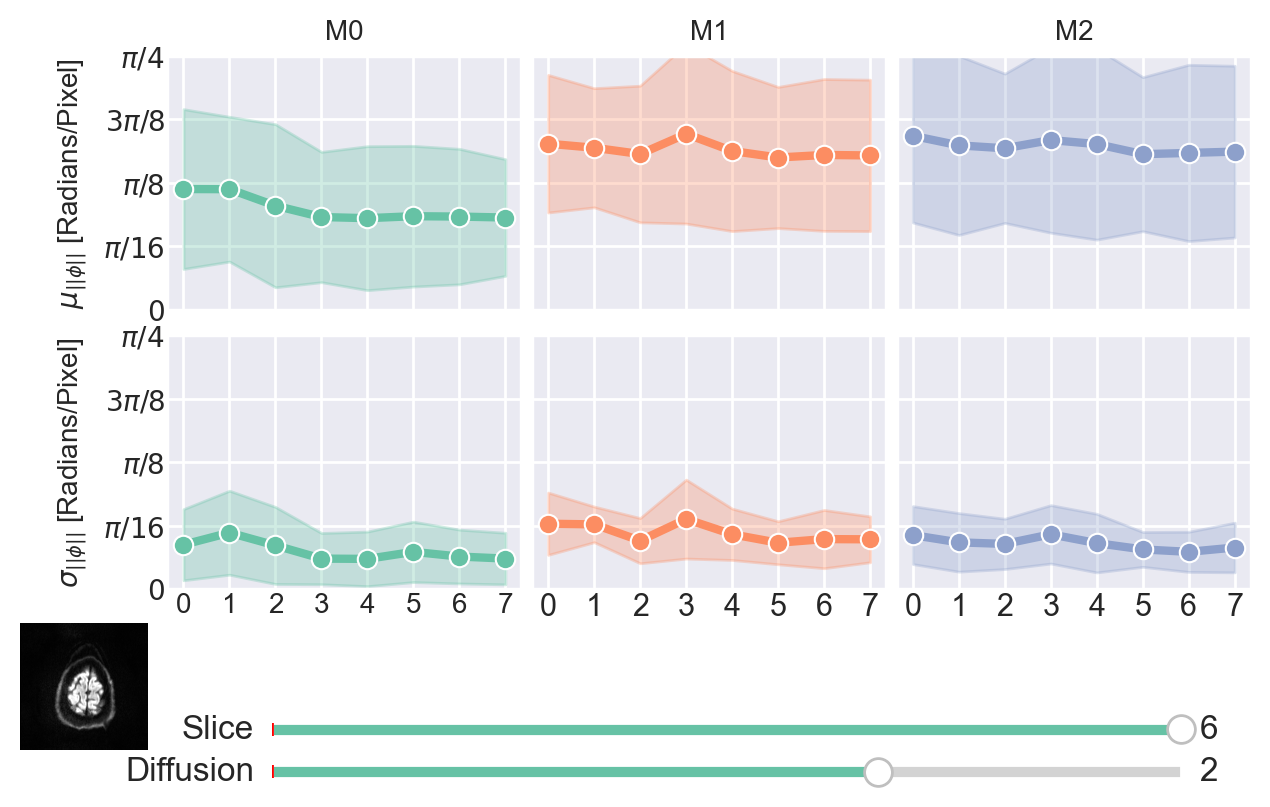

In [25]:
def update_plot(val):
    global slice 
    slice= int(slider.val)-1

    image_ax.clear()
    __, __, image, __  = load_image(0, 0, 1, diffusion, slice, directory)
    image_ax.imshow(image,cmap = 'gray',vmin = 0,vmax = 500)
    mag = image_ax.axis("off")

    # Update slice index for the lower and upper error bars 
    lower = mean_all[slice,diffusion,:,:] - error[slice,diffusion,:,:]
    upper = mean_all[slice,diffusion,:,:] + error[slice,diffusion,:,:]

    lowerS = std_all[slice,diffusion,:,:] - error_std[slice,diffusion,:,:]
    upperS= std_all[slice,diffusion,:,:] + error_std[slice,diffusion,:,:]
    for ii in range(3):
        ax[0,ii].clear()
        ax[1,ii].clear()
        sns.lineplot( data= (mean_all[slice,diffusion,:,ii]),  ax = ax[0,ii],linewidth =3,marker= 'o',markersize = 7,dashes= False, color = colors[ii],legend = None, )
        ax[0,ii].fill_between(np.arange(8),lower[:,ii],upper[:,ii],color = colors[ii],alpha = 0.3)
        ax[0,ii].set_yticks([0,math.pi/16,math.pi/8,3*math.pi/16,math.pi/4,math.pi/2])
        ax[0,ii].set_yticklabels(['','','','','',''],size = 10,rotation = 0)
        ax[0,ii].set_ylim([0,math.pi/4])
        
        sns.lineplot( data= (std_all[slice,diffusion,:,ii]),  ax = ax[1,ii],linewidth =3,marker= 'o',markersize = 7,dashes= False, color = colors[ii],legend = None, )
        ax[1,ii].fill_between(np.arange(8),lowerS[:,ii],upperS[:,ii],color = colors[ii],alpha = 0.3)
        ax[1,ii].set_ylim([0,math.pi/4])
        ax[1,ii].set_yticks([0,math.pi/16,math.pi/8,3*math.pi/16,math.pi/4,math.pi/2])
        ax[1,ii].set_yticklabels(['','','','','',''],size = 10,rotation = 0)
        ax[1,ii].set_ylim([0,math.pi/4])
        ax[1,ii].tick_params(axis='x', pad=-5)
    
    for ii in range(2):
        ax[ii,0].set_xticks([0,1,2,3,4,5,6,7])
        ax[ii,0].set_xticklabels([0,1,2,3,4,5,6,7],size = 10)
        ax[ii,0].tick_params(axis='y', which='major', labelsize=10)
        ax[ii,0].set_yticks([0,math.pi/16,math.pi/8,3*math.pi/16,math.pi/4,math.pi/2])
        ax[ii,0].set_yticklabels(['$0$','$\pi/16$','$\pi/8$','$3\pi/8$','$\pi/4$','$\pi/2$'],size = 10,rotation = 0)
        ax[ii,0].set_ylim([0,math.pi/4])
        ax[ii,0].tick_params(axis='y', pad=-5)
        
    ax[1,0].set_ylabel('$\sigma_{||\phi||}$ [Radians/Pixel]',rotation = 90, labelpad=5,size = 10)
    ax[0,0].set_ylabel('$\mu_{||\phi||}$ [Radians/Pixel]',rotation = 90, labelpad=5,size = 10)
        
    ax[0,1].set_xlabel('Trigger Delay [TD]',rotation = 0, labelpad=5,size = 10)
    ax[0,0].set_title('M0',rotation = 0,size = 10)
    ax[0,1].set_title('M1',rotation = 0, size = 10)
    ax[0,2].set_title('M2',rotation = 0, size = 10)
    
    # Update the plot
    canvas.draw()

# Create a Tkinter window
window = tk.Tk()

# Create a figure and axis for the bar and slider
fig, ax = plt.subplots(2, 3, figsize=(9, 6), dpi = 200, sharey=False,sharex = True)
plt.subplots_adjust(bottom=0.25,wspace=0.03, hspace=0.1)

# Plot the initial images for the first timepoint
# Initialize the plot elements
line = [None, None, None]
fill = [None, None, None]

# Plot the mean and standard deviation of phase
colors = sns.color_palette("colorblind",3)
colors = sns.color_palette("Set2",3)

# Default Plot Create
diffusion = 0
slice = 0
lower = mean_all[slice,diffusion,:,:] - error[slice,diffusion,:,:]
upper = mean_all[slice,diffusion,:,:] + error[slice,diffusion,:,:]

lowerS = std_all[slice,diffusion,:,:] - error_std[slice,diffusion,:,:]
upperS= std_all[slice,diffusion,:,:] + error_std[slice,diffusion,:,:]
for ii in range(3):
    sns.lineplot( data= (mean_all[slice,diffusion,:,ii]),  ax = ax[0,ii],linewidth =3,marker= 'o',markersize = 7,dashes= False, color = colors[ii],legend = None, )
    ax[0,ii].fill_between(np.arange(8),lower[:,ii],upper[:,ii],color = colors[ii],alpha = 0.3)
    ax[0,ii].set_yticks([0,math.pi/16,math.pi/8,3*math.pi/16,math.pi/4,math.pi/2])
    ax[0,ii].set_yticklabels(['','','','','',''],size = 10,rotation = 0)
    ax[0,ii].set_ylim([0,math.pi/4])
    

    sns.lineplot( data= (std_all[slice,diffusion,:,ii]),  ax = ax[1,ii],linewidth =3,marker= 'o',markersize = 7,dashes= False, color = colors[ii],legend = None, )
    ax[1,ii].fill_between(np.arange(8),lowerS[:,ii],upperS[:,ii],color = colors[ii],alpha = 0.3)
    ax[1,ii].set_ylim([0,math.pi/4])
    ax[1,ii].set_yticks([0,math.pi/16,math.pi/8,3*math.pi/16,math.pi/4,math.pi/2])
    ax[1,ii].set_yticklabels(['','','','','',''],size = 10,rotation = 0)
    ax[1,ii].set_ylim([0,math.pi/4])
    ax[1,ii].tick_params(axis='x', pad=-5)
    

for ii in range(2):
    ax[ii,0].set_xticks([0,1,2,3,4,5,6,7])
    ax[ii,0].set_xticklabels([0,1,2,3,4,5,6,7],size = 10)
    ax[ii,0].tick_params(axis='y', which='major', labelsize=10)
    ax[ii,0].set_yticks([0,math.pi/16,math.pi/8,3*math.pi/16,math.pi/4,math.pi/2])
    ax[ii,0].set_yticklabels(['$0$','$\pi/16$','$\pi/8$','$3\pi/8$','$\pi/4$','$\pi/2$'],size = 10,rotation = 0)
    ax[ii,0].set_ylim([0,math.pi/4])
    ax[ii,0].tick_params(axis='y', pad=-5)
    

ax[1,0].set_ylabel('$\sigma_{||\phi||}$ [Radians/Pixel]',rotation = 90, labelpad=5,size = 10)
ax[0,0].set_ylabel('$\mu_{||\phi||}$ [Radians/Pixel]',rotation = 90, labelpad=5,size = 10)
    
ax[0,1].set_xlabel('Trigger Delay [TD]',rotation = 0, labelpad=5,size = 10)
ax[0,0].set_title('M0',rotation = 0,size = 10)
ax[0,1].set_title('M1',rotation = 0, size = 10)
ax[0,2].set_title('M2',rotation = 0, size = 10)


# Create a slider for the slices
slider_ax = plt.axes([0.2, 0.07, 0.65, 0.03], facecolor='lightgray')
slider = Slider(slider_ax, 'Slice', 1, 6, valinit=0, valstep=1)

# Function to update figure based on diffusion direction
def change_diffusion(val):
    global diffusion
    diffusion = int(slider_diff.val)
    update_plot(slider.val)

# Create a slider for the slices
slider_ax_diff = plt.axes([0.2, 0.02, 0.65, 0.03], facecolor='lightgray')
slider_diff = Slider(slider_ax_diff, 'Diffusion', 0, 3, valinit=0, valstep=1)


# Attach the update_heatmap function to the slider's on_changed event
slider.on_changed(update_plot)
slider_diff.on_changed(change_diffusion)

# Add an image outside the subplots
image_ax = fig.add_axes([-0.01, 0.06, 0.15, 0.15])  # Adjust the coordinates as needed
# Use an example volunteer as reference image
__, __, image, __  = load_image(0, 0, 1, diffusion, slice, directory)
image_ax.imshow(image,cmap = 'gray',vmin = 0,vmax = 500)
mag = image_ax.axis("off")


# Create a Tkinter canvas and add the figure to it
canvas = FigureCanvasTkAgg(fig, master=window)
canvas.draw()
canvas.get_tk_widget().pack()

# Start the Tkinter event loop
window.mainloop()


# Figure Supplement: Statistical Testing Results for $\mu_{||\phi||}$ and  $\sigma_{||\phi||}$ Represented as heatmaps
Can vary diffusion direction and slice shown 

In [1]:
# Import utilities
from cmcrameri import cm
from helper_phase_utils import *
from matplotlib import pyplot as plt
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.widgets import Slider,RadioButtons,CheckButtons
from matplotlib.colors import BoundaryNorm, ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
import scikit_posthocs as sp
from scipy import stats
import tkinter as tk

/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
sns.set(style='darkgrid', palette='Set2')
# Load data
directory = '/Users/arielhannum/Documents/Stanford/CMR-Setsompop/Projects/Phase/Data/Brain' #'/Volumes/T7/phase_data/Brain'
color = cm.lajolla_r

# List the index of volunteers you want to see plotted 
list_vols = [1,2,3,4,5,7,8,9,10,11]
# Load and Compute the net mean and standard deviation of the temporal phase variation (this can take up to 2 minutes)
m0_mean, m0_std = get_spatialPhs_mean_std(directory,list_vols,0)
m1_mean,m1_std = get_spatialPhs_mean_std(directory,list_vols,1)
m2_mean,m2_std = get_spatialPhs_mean_std(directory,list_vols,2)

mean_combo = np.stack((m0_mean,m1_mean,m2_mean),axis = -1)
std_combo = np.stack((m0_std,m1_std,m2_std),axis = -1)

/Users/arielhannum/Documents/GitHub/dwi_phase/Interactive_Figs/helper_phase_utils.py:420: RuntimeWarning: Mean of empty slice
  mean_map = np.nanmean(spatial_map,axis = -2)
/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Finished volunteer 1/10
Finished volunteer 2/10
Finished volunteer 3/10
Finished volunteer 4/10
Finished volunteer 5/10
Finished volunteer 6/10
Finished volunteer 7/10
Finished volunteer 8/10
Finished volunteer 9/10
Finished volunteer 10/10
Finished volunteer 1/10
Finished volunteer 2/10
Finished volunteer 3/10
Finished volunteer 4/10
Finished volunteer 5/10
Finished volunteer 6/10
Finished volunteer 7/10
Finished volunteer 8/10
Finished volunteer 9/10
Finished volunteer 10/10
Finished volunteer 1/10
Finished volunteer 2/10
Finished volunteer 3/10
Finished volunteer 4/10
Finished volunteer 5/10
Finished volunteer 6/10
Finished volunteer 7/10
Finished volunteer 8/10
Finished volunteer 9/10
Finished volunteer 10/10


## $\mu_{||\phi||}$ Statistical Testing

/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))


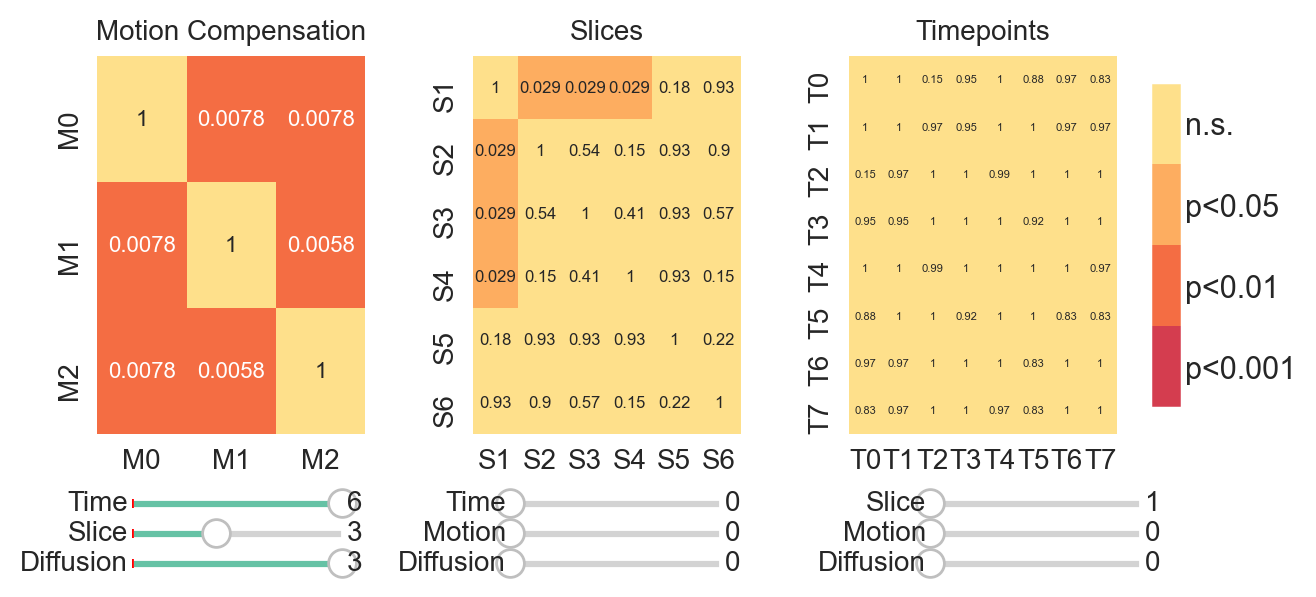

In [6]:
# Create Colormap and Ranges
my_colors = [sns.color_palette("Spectral",9)[0], sns.color_palette("Spectral",9)[1], sns.color_palette("Spectral",9)[2], 
            sns.color_palette("Spectral",9)[3]]
my_cmap = ListedColormap(my_colors)
bounds = [0, 0.001, 0.01, 0.05,1]
my_norm = BoundaryNorm(bounds, ncolors=len(my_colors))

# Create a Tkinter window
window = tk.Tk()

# Create a figure and axis for the bar and slider
fig, ax = plt.subplots(1, 3, figsize=(10, 3), dpi = 200)
plt.subplots_adjust(bottom=0.25,wspace=0.4, hspace=0.01)

# Plot the initial images for the first timepoint
# Initialize the plot elements
line = [None, None, None]
fill = [None, None, None]

# Plot the mean and standard deviation of phase
colors = sns.color_palette("colorblind",3)
colors = sns.color_palette("Set2",3)

# Default Plot Create
diffusion = 0
slice = 0
td=0

hypothesis = compute_statistics_motionComp(mean_combo[slice,diffusion,td,:,:],0.05)
check = np.sum(np.int32(np.isnan(hypothesis)))
if  check==9:
    hypothesis = np.ones((3,3))

plot = sns.heatmap(hypothesis,ax = ax[0], annot = True, xticklabels=['M0','M1','M2'],
        yticklabels=['M0','M1','M2'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":8})

ax[0].set_title('Motion Compensation',fontsize = 10)

# Create a slider for the slices
slider_ax = plt.axes([0.15, 0.07, 0.15, 0.03], facecolor='lightgray')
slider = Slider(slider_ax, 'Slice', 1, 6, valinit=0, valstep=1)

slider_ax_diff = plt.axes([0.15, 0.02, 0.15, 0.03], facecolor='lightgray')
slider_diff = Slider(slider_ax_diff, 'Diffusion', 0, 3, valinit=0, valstep=1)

slider_ax_time = plt.axes([0.15, 0.12, 0.15, 0.03], facecolor='lightgray')
slider_time = Slider(slider_ax_time, 'Time', 0, 6, valinit=0, valstep=1)

# Create colorbars for each row
cbar1 = fig.colorbar(plot.collections[0], ax=ax[:], fraction=0.03, pad=0.03, aspect=10)
cbar1.set_ticks([(0 + 0.001) / 2, (0.001 + 0.01) / 2, (0.01 + 0.05) / 2, (0.05 + 1) / 2])
cbar1.set_ticklabels(['p<0.001', 'p<0.01', 'p<0.05', 'n.s.'])

cbar1.ax.xaxis.set_ticks_position('none')  # Remove x-axis ticks
cbar1.ax.yaxis.set_ticks_position('none')  # Remove y-axis ticks
cbar1.ax.tick_params(pad=-5)

# Adjust the tick parameters
for ii in range(3):
    ax[ii].tick_params(axis='x', which='both', bottom=False, top=False, labelsize=10, pad=-1)
    ax[ii].tick_params(axis='y', which='both', left=False, right=False, labelsize=10, pad=-1)

# Function to update figure 1 based on slice location
def change_slice(val):
    global slice
    slice = int(slider.val)-1
    update_heatmap()

# Function to update figure 1 based on diffusion direction
def change_diffusion(val):
    global diffusion
    diffusion = int(slider_diff.val)
    update_heatmap()

# Function to update figure 1 based on timepoint
def change_timepoint(val):
    global td
    td = int(slider_time.val)
    update_heatmap()

# Function to update the first heatmap
def update_heatmap():
    ax[0].clear()
    hypothesis = compute_statistics_motionComp(mean_combo[slice,diffusion,td,:,:],0.05)
    check = np.sum(np.int32(np.isnan(hypothesis)))
    if  check==9:
        hypothesis = np.ones((3,3))
    plot = sns.heatmap(hypothesis,ax = ax[0], annot = True, xticklabels=['M0','M1','M2'],
        yticklabels=['M0','M1','M2'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":8})
    ax[0].set_title('Motion Compensation',fontsize = 10)


# Attach the update_heatmap function to the slider's on_changed event for subplot 1
slider.on_changed(change_slice)
slider_diff.on_changed(change_diffusion)
slider_time.on_changed(change_timepoint)

##############################################################################################################
# Function to update the second heatmap
def update_heatmap2():
    ax[1].clear()
    hypothesis = compute_statistics_slices(mean_combo[:,diffusion,td,:,motion],0.05)
    check = np.sum(np.int32(np.isnan(hypothesis)))
    if  check==6**2:
        hypothesis = np.ones((6,6))
    plot = sns.heatmap(hypothesis,ax = ax[1], annot = True, xticklabels=['S1','S2','S3','S4','S5','S6'],
        yticklabels=['S1','S2','S3','S4','S5','S6'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":6})
    ax[1].set_title('Slices',fontsize = 10)
    

# Function to update subplot 2 based on variables
def change_val(val):
    global motion,td,diffusion
    motion = int(slider_motion1.val)
    td = int(slider_time2.val)
    diffusion = int(slider_diff2.val)
    update_heatmap2()

# Create Sliders for motion, time and diffusion
slider_ax_motion = plt.axes([0.42, 0.07, 0.15, 0.03], facecolor='lightgray')
slider_motion1 = Slider(slider_ax_motion, 'Motion', 0, 2, valinit=0, valstep=1)

slider_ax_time2 = plt.axes([0.42, 0.12, 0.15, 0.03], facecolor='lightgray')
slider_time2 = Slider(slider_ax_time2, 'Time', 0, 7, valinit=0, valstep=1)

slider_ax_diff = plt.axes([0.42, 0.02, 0.15, 0.03], facecolor='lightgray')
slider_diff2 = Slider(slider_ax_diff, 'Diffusion', 0, 3, valinit=0, valstep=1)

# Update figure when changed 
slider_motion1.on_changed(change_val)
slider_time2.on_changed(change_val)
slider_diff2.on_changed(change_val)

# Initial Heatmap
diffusion = 0
td = 0
motion = 0
ax[1].clear()
hypothesis = compute_statistics_slices(mean_combo[:,diffusion,td,:,motion],0.05)
check = np.sum(np.int32(np.isnan(hypothesis)))
if  check==6**2:
    hypothesis = np.ones((6,6))
plot = sns.heatmap(hypothesis,ax = ax[1], annot = True, xticklabels=['S1','S2','S3','S4','S5','S6'],
    yticklabels=['S1','S2','S3','S4','S5','S6'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":6})
ax[1].set_title('Slices',fontsize = 10)

##############################################################################################################
# Third subplot for diffeences in timepoints 

# Function to update the second heatmap
def update_heatmap3():
    ax[2].clear()
    hypothesis = compute_statistics_timepoints(mean_combo[slice,diffusion,:,:,motion],0.05)
    check = np.sum(np.int32(np.isnan(hypothesis)))
    if  check==8**2:
        hypothesis = np.ones((8,8))
    plot = sns.heatmap(hypothesis,ax = ax[2], annot = True, xticklabels=['T0','T1','T2','T3','T4','T5','T6','T7'],
        yticklabels=['T0','T1','T2','T3','T4','T5','T6','T7'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":4})
    ax[2].set_title('Timepoints',fontsize = 10)
    

# Function to update subplot 2 based on variables
def change_val3(val):
    global motion,td,diffusion,slice
    motion = int(slider_motion3.val)
    slice = int(slider_slice3.val)-1
    diffusion = int(slider_diff3.val)
    update_heatmap3()

# Create Sliders for motion, time and diffusion
slider_ax_motion3 = plt.axes([0.72, 0.07, 0.15, 0.03], facecolor='lightgray')
slider_motion3 = Slider(slider_ax_motion3, 'Motion', 0, 2, valinit=0, valstep=1)

slider_ax_slice3 = plt.axes([0.72, 0.12, 0.15, 0.03], facecolor='lightgray')
slider_slice3 = Slider(slider_ax_slice3, 'Slice', 1,6, valinit=0, valstep=1)

slider_ax_diff3 = plt.axes([0.72, 0.02, 0.15, 0.03], facecolor='lightgray')
slider_diff3 = Slider(slider_ax_diff3, 'Diffusion', 0, 3, valinit=0, valstep=1)

# Update figure when changed 
slider_motion3.on_changed(change_val3)
slider_slice3.on_changed(change_val3)
slider_diff3.on_changed(change_val3)

# Set default view
slice = 0
diffusion = 0
motion = 0
ax[2].clear()
hypothesis = compute_statistics_timepoints(mean_combo[slice,diffusion,:,:,motion],0.05)
check = np.sum(np.int32(np.isnan(hypothesis)))
if  check==8**2:
    hypothesis = np.ones((8,8))
plot = sns.heatmap(hypothesis,ax = ax[2], annot = True, xticklabels=['T0','T1','T2','T3','T4','T5','T6','T7'],
    yticklabels=['T0','T1','T2','T3','T4','T5','T6','T7'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":4})
ax[2].set_title('Timepoints',fontsize = 10)
    


##############################################################################################################
# Create a Tkinter canvas and add the figure to it
canvas = FigureCanvasTkAgg(fig, master=window)
canvas.draw()
canvas.get_tk_widget().pack()



# Start the Tkinter event loop
window.mainloop()

In [4]:
# Get the summative count for all the data:
m0_v_m1 = np.zeros((4,6,8))
m0_v_m2 = np.zeros((4,6,8))
m1_v_m2 = np.zeros((4,6,8))

# Iterate through slice, diffusion, td
for diffusion in range(4):
    for slice in range(6):
        for td in range(8):
            group1 = np.mean(mean_combo[slice,diffusion,td,:,0])
            group2 = np.mean(mean_combo[slice,diffusion,td,:,1])
            group3 = np.mean(mean_combo[slice,diffusion,td,:,2])
            hypothesis = compute_statistics_motionComp(mean_combo[slice,diffusion,td,:,:],0.05)
            if np.array(hypothesis)[0,1] < 0.05 and group2<group1:
                m0_v_m1[diffusion,slice,td] = 1
            if np.array(hypothesis)[0,2] < 0.05 and group3<group1:
                m0_v_m2[diffusion,slice,td] = 1
            if np.array(hypothesis)[1,2] < 0.05 and group3<group2:
                m1_v_m2[diffusion,slice,td] = 1

# Get the summative count for all the data:
print('Per Diffusion Where motion compensation is reducing spatial phase gradient mean')
for diffusion in range(4):
    total = 6*8
    print('Diffusion: ',diffusion,' m0_v_m1: ',np.sum(m0_v_m1[diffusion,:,:])/total*100,'% \t',\
        ' m0_v_m2: ',np.sum(m0_v_m2[diffusion,:,:])/total*100,'%\t',' m1_v_m2: ',np.sum(m1_v_m2[diffusion,:,:])/total*100,'%\t')


print('\n\n')
##### Where the mean spatial phase increases with motion compensation
m0_v_m1 = np.zeros((4,6,8))
m0_v_m2 = np.zeros((4,6,8))
m1_v_m2 = np.zeros((4,6,8))
# Iterate through slice, diffusion, td
for diffusion in range(4):
    for slice in range(6):
        for td in range(8):
            group1 = np.mean(mean_combo[slice,diffusion,td,:,0])
            group2 = np.mean(mean_combo[slice,diffusion,td,:,1])
            group3 = np.mean(mean_combo[slice,diffusion,td,:,2])
            hypothesis = compute_statistics_motionComp(mean_combo[slice,diffusion,td,:,:],0.05)
            if np.array(hypothesis)[0,1] < 0.05 and group2>group1:
                m0_v_m1[diffusion,slice,td] = 1
            if np.array(hypothesis)[0,2] < 0.05 and group3>group1:
                m0_v_m2[diffusion,slice,td] = 1
            if np.array(hypothesis)[1,2] < 0.05 and group3>group2:
                m1_v_m2[diffusion,slice,td] = 1

# Get the summative count for all the data:
print('Per Diffusion Where motion compensation increases spatial phase gradient mean')
for diffusion in range(4):
    total = 6*8
    print('Diffusion: ',diffusion,' m0_v_m1: ',np.sum(m0_v_m1[diffusion,:,:])/total*100,'% \t',\
        ' m0_v_m2: ',np.sum(m0_v_m2[diffusion,:,:])/total*100,'%\t',' m1_v_m2: ',np.sum(m1_v_m2[diffusion,:,:])/total*100,'%\t')



     

/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.l

Per Diffusion Where motion compensation is reducing spatial phase gradient mean
Diffusion:  0  m0_v_m1:  0.0 % 	  m0_v_m2:  0.0 %	  m1_v_m2:  0.0 %	
Diffusion:  1  m0_v_m1:  25.0 % 	  m0_v_m2:  0.0 %	  m1_v_m2:  0.0 %	
Diffusion:  2  m0_v_m1:  0.0 % 	  m0_v_m2:  0.0 %	  m1_v_m2:  0.0 %	
Diffusion:  3  m0_v_m1:  22.916666666666664 % 	  m0_v_m2:  2.083333333333333 %	  m1_v_m2:  0.0 %	



Per Diffusion Where motion compensation increases spatial phase gradient mean
Diffusion:  0  m0_v_m1:  54.166666666666664 % 	  m0_v_m2:  85.41666666666666 %	  m1_v_m2:  77.08333333333334 %	
Diffusion:  1  m0_v_m1:  22.916666666666664 % 	  m0_v_m2:  91.66666666666666 %	  m1_v_m2:  100.0 %	
Diffusion:  2  m0_v_m1:  75.0 % 	  m0_v_m2:  85.41666666666666 %	  m1_v_m2:  35.41666666666667 %	
Diffusion:  3  m0_v_m1:  0.0 % 	  m0_v_m2:  62.5 %	  m1_v_m2:  68.75 %	


/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))


## $\sigma_{||\phi||}$ Statistical Testing

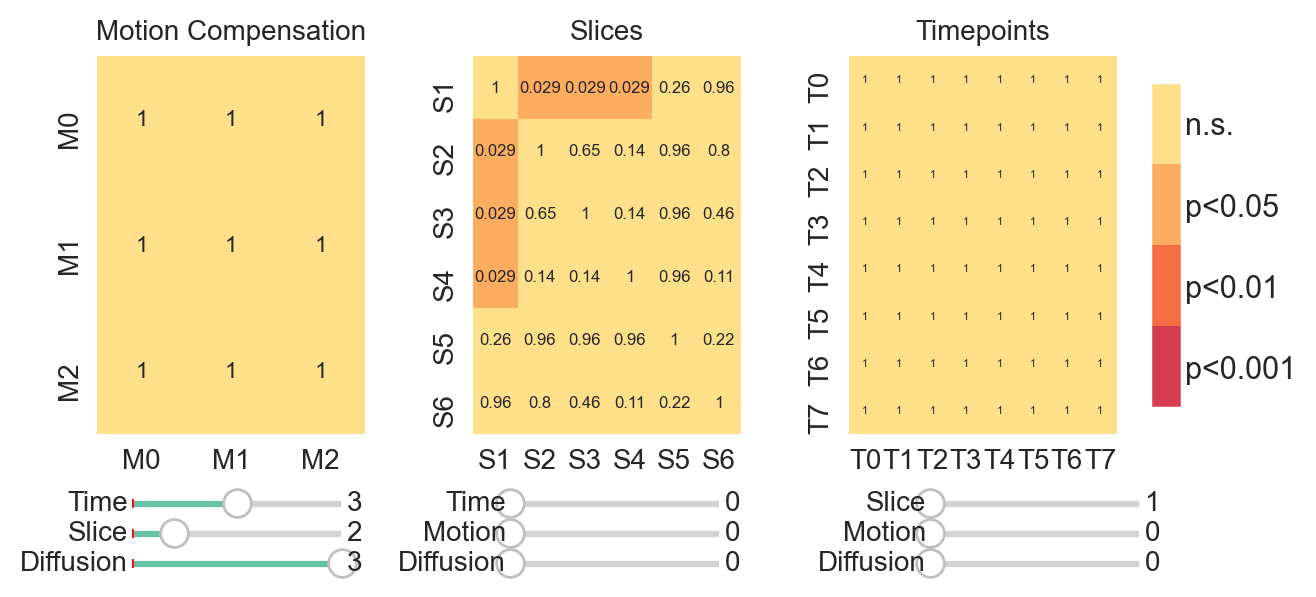

In [7]:
# Create Colormap and Ranges
my_colors = [sns.color_palette("Spectral",9)[0], sns.color_palette("Spectral",9)[1], sns.color_palette("Spectral",9)[2], 
            sns.color_palette("Spectral",9)[3]]
my_cmap = ListedColormap(my_colors)
bounds = [0, 0.001, 0.01, 0.05,1]
my_norm = BoundaryNorm(bounds, ncolors=len(my_colors))

# Create a Tkinter window
window = tk.Tk()

# Create a figure and axis for the bar and slider
fig, ax = plt.subplots(1, 3, figsize=(10, 3), dpi = 200)
plt.subplots_adjust(bottom=0.25,wspace=0.4, hspace=0.01)

# Plot the initial images for the first timepoint
# Initialize the plot elements
line = [None, None, None]
fill = [None, None, None]

# Plot the mean and standard deviation of phase
colors = sns.color_palette("colorblind",3)
colors = sns.color_palette("Set2",3)

# Default Plot Create
diffusion = 0
slice = 0
td=0

hypothesis = compute_statistics_motionComp(std_combo[slice,diffusion,td,:,:],0.05)
check = np.sum(np.int32(np.isnan(hypothesis)))
if  check==9:
    hypothesis = np.ones((3,3))

plot = sns.heatmap(hypothesis,ax = ax[0], annot = True, xticklabels=['M0','M1','M2'],
        yticklabels=['M0','M1','M2'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":8})

ax[0].set_title('Motion Compensation',fontsize = 10)

# Create a slider for the slices
slider_ax = plt.axes([0.15, 0.07, 0.15, 0.03], facecolor='lightgray')
slider = Slider(slider_ax, 'Slice', 1, 6, valinit=0, valstep=1)

slider_ax_diff = plt.axes([0.15, 0.02, 0.15, 0.03], facecolor='lightgray')
slider_diff = Slider(slider_ax_diff, 'Diffusion', 0, 3, valinit=0, valstep=1)

slider_ax_time = plt.axes([0.15, 0.12, 0.15, 0.03], facecolor='lightgray')
slider_time = Slider(slider_ax_time, 'Time', 0, 6, valinit=0, valstep=1)

# Create colorbars for each row
cbar1 = fig.colorbar(plot.collections[0], ax=ax[:], fraction=0.03, pad=0.03, aspect=10)
cbar1.set_ticks([(0 + 0.001) / 2, (0.001 + 0.01) / 2, (0.01 + 0.05) / 2, (0.05 + 1) / 2])
cbar1.set_ticklabels(['p<0.001', 'p<0.01', 'p<0.05', 'n.s.'])

cbar1.ax.xaxis.set_ticks_position('none')  # Remove x-axis ticks
cbar1.ax.yaxis.set_ticks_position('none')  # Remove y-axis ticks
cbar1.ax.tick_params(pad=-5)

# Adjust the tick parameters
for ii in range(3):
    ax[ii].tick_params(axis='x', which='both', bottom=False, top=False, labelsize=10, pad=-1)
    ax[ii].tick_params(axis='y', which='both', left=False, right=False, labelsize=10, pad=-1)

# Function to update figure 1 based on slice location
def change_slice(val):
    global slice
    slice = int(slider.val)-1
    update_heatmap()

# Function to update figure 1 based on diffusion direction
def change_diffusion(val):
    global diffusion
    diffusion = int(slider_diff.val)
    update_heatmap()

# Function to update figure 1 based on timepoint
def change_timepoint(val):
    global td
    td = int(slider_time.val)
    update_heatmap()

# Function to update the first heatmap
def update_heatmap():
    ax[0].clear()
    hypothesis = compute_statistics_motionComp(std_combo[slice,diffusion,td,:,:],0.05)
    check = np.sum(np.int32(np.isnan(hypothesis)))
    if  check==9:
        hypothesis = np.ones((3,3))
    plot = sns.heatmap(hypothesis,ax = ax[0], annot = True, xticklabels=['M0','M1','M2'],
        yticklabels=['M0','M1','M2'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":8})
    ax[0].set_title('Motion Compensation',fontsize = 10)


# Attach the update_heatmap function to the slider's on_changed event for subplot 1
slider.on_changed(change_slice)
slider_diff.on_changed(change_diffusion)
slider_time.on_changed(change_timepoint)

##############################################################################################################
# Function to update the second heatmap
def update_heatmap2():
    ax[1].clear()
    hypothesis = compute_statistics_slices(std_combo[:,diffusion,td,:,motion],0.05)
    check = np.sum(np.int32(np.isnan(hypothesis)))
    if  check==6**2:
        hypothesis = np.ones((6,6))
    plot = sns.heatmap(hypothesis,ax = ax[1], annot = True, xticklabels=['S1','S2','S3','S4','S5','S6'],
        yticklabels=['S1','S2','S3','S4','S5','S6'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":6})
    ax[1].set_title('Slices',fontsize = 10)
    

# Function to update subplot 2 based on variables
def change_val(val):
    global motion,td,diffusion
    motion = int(slider_motion1.val)
    td = int(slider_time2.val)
    diffusion = int(slider_diff2.val)
    update_heatmap2()

# Create Sliders for motion, time and diffusion
slider_ax_motion = plt.axes([0.42, 0.07, 0.15, 0.03], facecolor='lightgray')
slider_motion1 = Slider(slider_ax_motion, 'Motion', 0, 2, valinit=0, valstep=1)

slider_ax_time2 = plt.axes([0.42, 0.12, 0.15, 0.03], facecolor='lightgray')
slider_time2 = Slider(slider_ax_time2, 'Time', 0, 7, valinit=0, valstep=1)

slider_ax_diff = plt.axes([0.42, 0.02, 0.15, 0.03], facecolor='lightgray')
slider_diff2 = Slider(slider_ax_diff, 'Diffusion', 0, 3, valinit=0, valstep=1)

# Update figure when changed 
slider_motion1.on_changed(change_val)
slider_time2.on_changed(change_val)
slider_diff2.on_changed(change_val)

# Initial Heatmap
diffusion = 0
td = 0
motion = 0
ax[1].clear()
hypothesis = compute_statistics_slices(std_combo[:,diffusion,td,:,motion],0.05)
check = np.sum(np.int32(np.isnan(hypothesis)))
if  check==6**2:
    hypothesis = np.ones((6,6))
plot = sns.heatmap(hypothesis,ax = ax[1], annot = True, xticklabels=['S1','S2','S3','S4','S5','S6'],
    yticklabels=['S1','S2','S3','S4','S5','S6'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":6})
ax[1].set_title('Slices',fontsize = 10)

##############################################################################################################
# Third subplot for diffeences in timepoints 

# Function to update the second heatmap
def update_heatmap3():
    ax[2].clear()
    hypothesis = compute_statistics_timepoints(std_combo[slice,diffusion,:,:,motion],0.05)
    check = np.sum(np.int32(np.isnan(hypothesis)))
    if  check==8**2:
        hypothesis = np.ones((8,8))
    plot = sns.heatmap(hypothesis,ax = ax[2], annot = True, xticklabels=['T0','T1','T2','T3','T4','T5','T6','T7'],
        yticklabels=['T0','T1','T2','T3','T4','T5','T6','T7'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":4})
    ax[2].set_title('Timepoints',fontsize = 10)
    

# Function to update subplot 2 based on variables
def change_val3(val):
    global motion,td,diffusion,slice
    motion = int(slider_motion3.val)
    slice = int(slider_slice3.val)-1
    diffusion = int(slider_diff3.val)
    update_heatmap3()

# Create Sliders for motion, time and diffusion
slider_ax_motion3 = plt.axes([0.72, 0.07, 0.15, 0.03], facecolor='lightgray')
slider_motion3 = Slider(slider_ax_motion3, 'Motion', 0, 2, valinit=0, valstep=1)

slider_ax_slice3 = plt.axes([0.72, 0.12, 0.15, 0.03], facecolor='lightgray')
slider_slice3 = Slider(slider_ax_slice3, 'Slice', 1,6, valinit=0, valstep=1)

slider_ax_diff3 = plt.axes([0.72, 0.02, 0.15, 0.03], facecolor='lightgray')
slider_diff3 = Slider(slider_ax_diff3, 'Diffusion', 0, 3, valinit=0, valstep=1)

# Update figure when changed 
slider_motion3.on_changed(change_val3)
slider_slice3.on_changed(change_val3)
slider_diff3.on_changed(change_val3)

# Set default view
slice = 0
diffusion = 0
motion = 0
ax[2].clear()
hypothesis = compute_statistics_timepoints(std_combo[slice,diffusion,:,:,motion],0.05)
check = np.sum(np.int32(np.isnan(hypothesis)))
if  check==8**2:
    hypothesis = np.ones((8,8))
plot = sns.heatmap(hypothesis,ax = ax[2], annot = True, xticklabels=['T0','T1','T2','T3','T4','T5','T6','T7'],
    yticklabels=['T0','T1','T2','T3','T4','T5','T6','T7'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":4})
ax[2].set_title('Timepoints',fontsize = 10)
    


##############################################################################################################
# Create a Tkinter canvas and add the figure to it
canvas = FigureCanvasTkAgg(fig, master=window)
canvas.draw()
canvas.get_tk_widget().pack()



# Start the Tkinter event loop
window.mainloop()

In [22]:
# Get the summative count for all the data:
m0_v_m1 = np.zeros((4,6,8))
m0_v_m2 = np.zeros((4,6,8))
m1_v_m2 = np.zeros((4,6,8))

# Iterate through slice, diffusion, td
for diffusion in range(4):
    for slice in range(6):
        for td in range(8):
            group1 = np.mean(std_combo[slice,diffusion,td,:,0])
            group2 = np.mean(std_combo[slice,diffusion,td,:,1])
            group3 = np.mean(std_combo[slice,diffusion,td,:,2])
            hypothesis = compute_statistics_motionComp(std_combo[slice,diffusion,td,:,:],0.05)
            if np.array(hypothesis)[0,1] < 0.05 and group2<group1:
                m0_v_m1[diffusion,slice,td] = 1
            if np.array(hypothesis)[0,2] < 0.05 and group3<group1:
                m0_v_m2[diffusion,slice,td] = 1
            if np.array(hypothesis)[1,2] < 0.05 and group3<group2:
                m1_v_m2[diffusion,slice,td] = 1

# Get the summative count for all the data:
print('Per Diffusion where std spatial phase gradient decreases with motion compensation')
for diffusion in range(4):
    total = 6*8
    print('Diffusion: ',diffusion,' m0_v_m1: ',np.sum(m0_v_m1[diffusion,:,:])/total*100,'% \t',\
        ' m0_v_m2: ',np.sum(m0_v_m2[diffusion,:,:])/total*100,'%\t',' m1_v_m2: ',np.sum(m1_v_m2[diffusion,:,:])/total*100,'%\t')



print('\n\n')
##### Where the mean spatial phase increases with motion compensation
m0_v_m1 = np.zeros((4,6,8))
m0_v_m2 = np.zeros((4,6,8))
m1_v_m2 = np.zeros((4,6,8))
# Iterate through slice, diffusion, td
for diffusion in range(4):
    for slice in range(6):
        for td in range(8):
            group1 = np.mean(std_combo[slice,diffusion,td,:,0])
            group2 = np.mean(std_combo[slice,diffusion,td,:,1])
            group3 = np.mean(std_combo[slice,diffusion,td,:,2])
            hypothesis = compute_statistics_motionComp(std_combo[slice,diffusion,td,:,:],0.05)
            if np.array(hypothesis)[0,1] < 0.05 and group2>group1:
                m0_v_m1[diffusion,slice,td] = 1
            if np.array(hypothesis)[0,2] < 0.05 and group3>group1:
                m0_v_m2[diffusion,slice,td] = 1
            if np.array(hypothesis)[1,2] < 0.05 and group3>group2:
                m1_v_m2[diffusion,slice,td] = 1

# Get the summative count for all the data:
print('Per Diffusion Where motion compensation increases spatial phase gradient std')
for diffusion in range(4):
    total = 6*8
    print('Diffusion: ',diffusion,' m0_v_m1: ',np.sum(m0_v_m1[diffusion,:,:])/total*100,'% \t',\
        ' m0_v_m2: ',np.sum(m0_v_m2[diffusion,:,:])/total*100,'%\t',' m1_v_m2: ',np.sum(m1_v_m2[diffusion,:,:])/total*100,'%\t')

     

/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))


Per Diffusion where std spatial phase gradient decreases with motion compensation
Diffusion:  0  m0_v_m1:  0.0 % 	  m0_v_m2:  0.0 %	  m1_v_m2:  0.0 %	
Diffusion:  1  m0_v_m1:  0.0 % 	  m0_v_m2:  0.0 %	  m1_v_m2:  0.0 %	
Diffusion:  2  m0_v_m1:  0.0 % 	  m0_v_m2:  0.0 %	  m1_v_m2:  0.0 %	
Diffusion:  3  m0_v_m1:  2.083333333333333 % 	  m0_v_m2:  2.083333333333333 %	  m1_v_m2:  0.0 %	





/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))


Per Diffusion Where motion compensation increases spatial phase gradient std
Diffusion:  0  m0_v_m1:  33.33333333333333 % 	  m0_v_m2:  72.91666666666666 %	  m1_v_m2:  66.66666666666666 %	
Diffusion:  1  m0_v_m1:  12.5 % 	  m0_v_m2:  62.5 %	  m1_v_m2:  70.83333333333334 %	
Diffusion:  2  m0_v_m1:  41.66666666666667 % 	  m0_v_m2:  56.25 %	  m1_v_m2:  33.33333333333333 %	
Diffusion:  3  m0_v_m1:  0.0 % 	  m0_v_m2:  2.083333333333333 %	  m1_v_m2:  18.75 %	
